### Bagging

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

# Cria exemplos - default classes = 2
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = BaggingClassifier() # 10 estimadores

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Acurácia: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acurácia: 0.868 (0.038)


### Bagging Hyperparameters

In [3]:
from matplotlib import pyplot

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def executar_teste(models):
    results, names = list(), list() # avaliar resultados e guardar em results

    for name, model in models.items():

        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)

        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


    pyplot.boxplot(results, tick_labels=names, showmeans=True)
    pyplot.show()

#### Verificar Número de Árvores

>10 0.865 (0.037)
>50 0.882 (0.040)
>100 0.880 (0.035)
>500 0.884 (0.037)
>1000 0.885 (0.037)
>5000 0.886 (0.038)


C:\Users\augba\AppData\Local\Temp\ipykernel_21672\2123088906.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


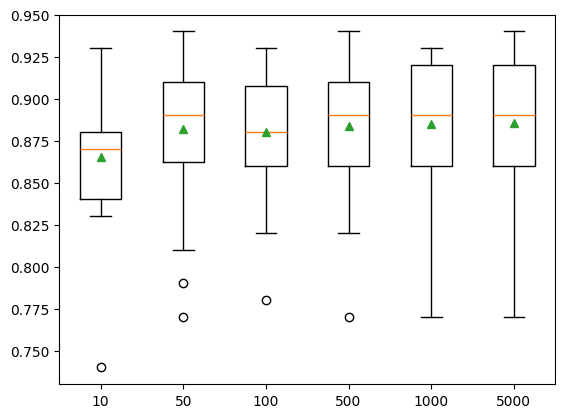

In [4]:
def get_models():
    models = dict()
    # definir numero de árvores
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

executar_teste(get_models())

#### Verificar Número Máximo de Exemplos

>0.1 0.816 (0.038)
>0.2 0.827 (0.042)
>0.3 0.850 (0.035)
>0.4 0.853 (0.041)
>0.5 0.857 (0.037)
>0.6 0.853 (0.044)
>0.7 0.859 (0.045)
>0.8 0.857 (0.036)
>0.9 0.862 (0.042)
>1.0 0.858 (0.033)


C:\Users\augba\AppData\Local\Temp\ipykernel_21672\2123088906.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


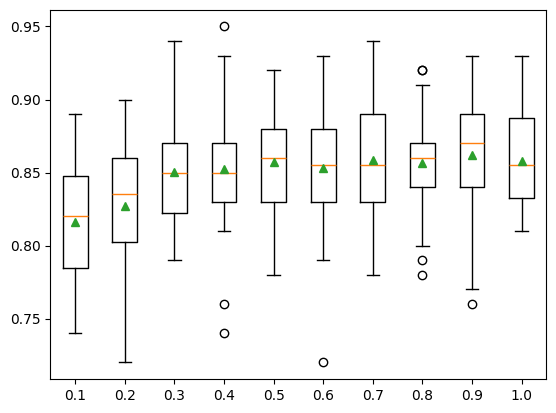

In [9]:
import numpy as np

def get_models():
    models = dict()
    # definir max_samples entre 10% e 100% com passo de 10%
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i)
    return models

executar_teste(get_models())

#### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Acurácia: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acurácia: 0.899 (0.035)


### Carregar Digits

In [11]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits 
 
digits = load_digits() 

#### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nb_classifications = 100
rf_accuracy = []

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    a = cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()
    rf_accuracy.append(a)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


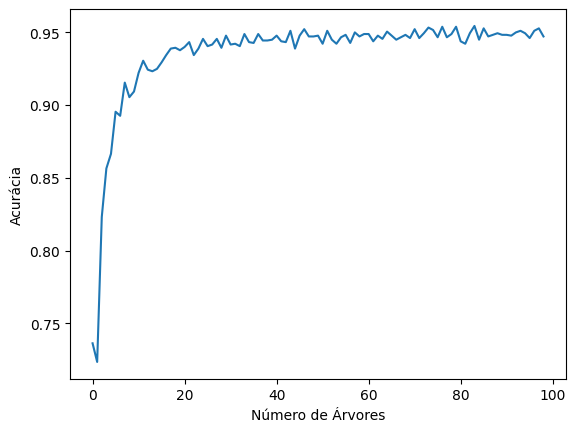

In [13]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(rf_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

#### Extra Trees Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

nb_classifications = 100
et_accuracy = []

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    a = cross_val_score(ExtraTreesClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()
    et_accuracy.append(a)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


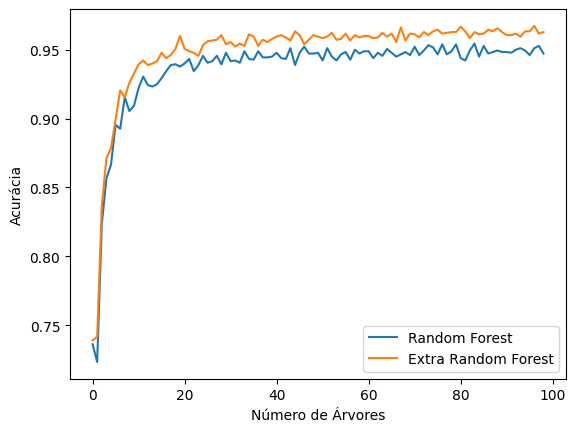

In [16]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(rf_accuracy,label="Random Forest")
plt.plot(et_accuracy,label="Extra Random Forest")

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.legend()

plt.show()

#### Feature Importance

In [17]:
from sklearn.datasets import make_classification
nb_samples = 1000

X, Y = make_classification(n_samples=nb_samples, n_features=20, n_informative=15, n_redundant=5, n_classes=2, n_clusters_per_class=5)


In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names


In [19]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

RandomForestClassifier(random_state=0)

In [20]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tempo usado para computar as importâncias: {elapsed_time:.3f} segs")

Tempo usado para computar as importâncias: 0.018 segs


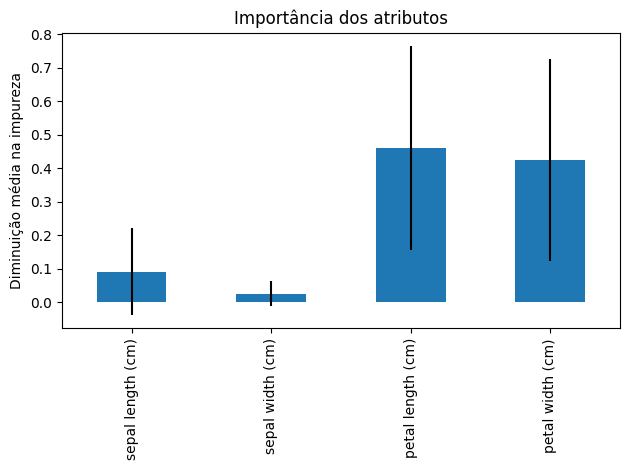

In [21]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Diminuição média na impureza")  # MDI = Mean decrease in impurity 
fig.tight_layout()

### AdaBoost

In [25]:
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

from sklearn.ensemble import AdaBoostClassifier

ab_accuracy = []

nb_classifications = 100

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    a = cross_val_score(AdaBoostClassifier(n_estimators=i, learning_rate=0.01), digits.data, digits.target, scoring='accuracy', cv=10).mean()
    ab_accuracy.append(a)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


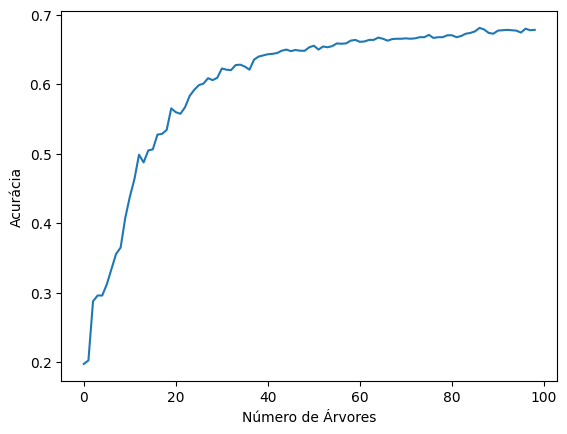

In [26]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ab_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
ab_accuracy2 = []

#ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
#print(cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10).mean())

nb_classifications = 100

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    ada = AdaBoostClassifier(n_estimators=i, learning_rate=1.0)
    a = cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10).mean()
    ab_accuracy2.append(a)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


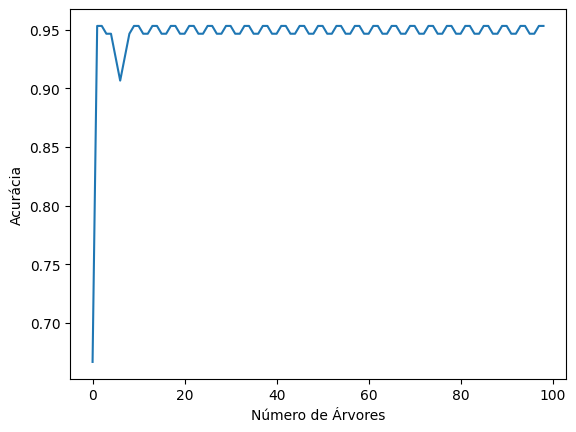

In [28]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ab_accuracy2)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

### Gradient Tree Boosting

In [29]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_accuracy = []

max_estimators = 100

for i in range(1, max_estimators):
    print(i,nb_classifications)
    score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=10.0/float(i)), X, Y, cv=10, scoring='accuracy').mean()
    #score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean()
    gb_accuracy.append(score)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


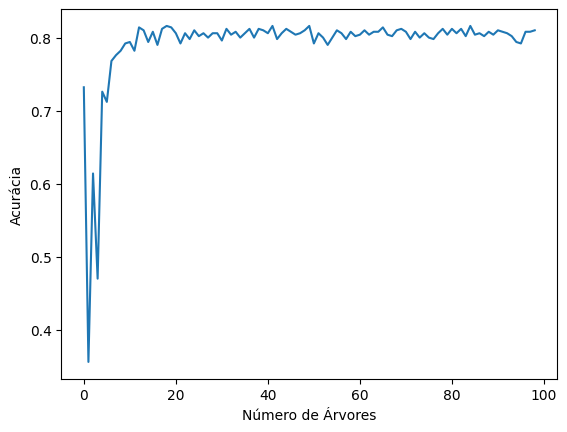

In [31]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(gb_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

In [32]:
print(cross_val_score(GradientBoostingClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.76


### Ada Tree Boosting

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


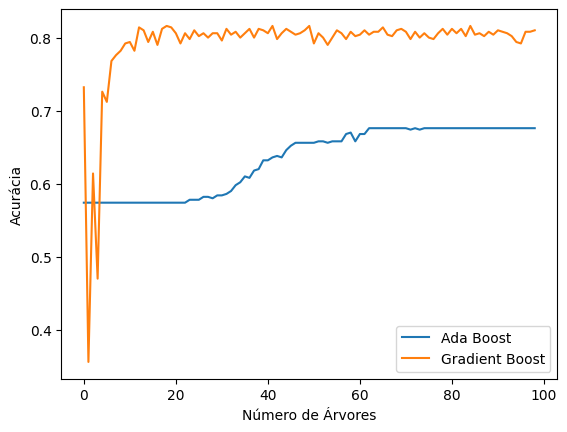

In [33]:
import matplotlib.pyplot as plt
ab_accuracy = []

nb_classifications = 100

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    a = cross_val_score(AdaBoostClassifier(n_estimators=i, learning_rate=0.01),  X, Y, scoring='accuracy', cv=10).mean()
    ab_accuracy.append(a)
    
plt.figure()

plt.plot(ab_accuracy,label="Ada Boost")
plt.plot(gb_accuracy,label="Gradient Boost")

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.legend()

plt.show()

### Outros Algoritmos

In [34]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [35]:
print(cross_val_score(GradientBoostingClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.826


In [37]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

print(cross_val_score(LGBMClassifier(n_estimators=50, learning_rate=0.01, verbose=-1), X, Y, cv=10, scoring='accuracy').mean())

0.8459999999999999


In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier
print(cross_val_score(HistGradientBoostingClassifier(learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())


0.868


In [39]:
#!pip install xgboost
from xgboost import XGBClassifier

print(cross_val_score(XGBClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.85


In [41]:
#!pip install catboost
from catboost import CatBoostClassifier
print(cross_val_score(CatBoostClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0:	learn: 1.0890724	total: 58.1ms	remaining: 2.85s
1:	learn: 1.0795486	total: 61.4ms	remaining: 1.47s
2:	learn: 1.0691438	total: 64.8ms	remaining: 1.01s
3:	learn: 1.0586217	total: 67.5ms	remaining: 776ms
4:	learn: 1.0493020	total: 70.2ms	remaining: 632ms
5:	learn: 1.0418425	total: 77.1ms	remaining: 565ms
6:	learn: 1.0327155	total: 80ms	remaining: 492ms
7:	learn: 1.0239765	total: 83.7ms	remaining: 440ms
8:	learn: 1.0149546	total: 87.7ms	remaining: 399ms
9:	learn: 1.0064537	total: 93.1ms	remaining: 372ms
10:	learn: 0.9985658	total: 97.3ms	remaining: 345ms
11:	learn: 0.9897302	total: 102ms	remaining: 322ms
12:	learn: 0.9815425	total: 106ms	remaining: 301ms
13:	learn: 0.9732591	total: 109ms	remaining: 279ms
14:	learn: 0.9664256	total: 112ms	remaining: 262ms
15:	learn: 0.9576694	total: 115ms	remaining: 245ms
16:	learn: 0.9499088	total: 121ms	remaining: 236ms
17:	learn: 0.9418869	total: 125ms	remaining: 223ms
18:	learn: 0.9343997	total: 129ms	remaining: 211ms
19:	learn: 0.9266165	total: 135m

### Voting classifier

In [42]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, n_classes=2)

In [43]:
X, Y = digits.data, digits.target

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter = 5000)
svc = SVC(kernel='poly', probability=True, max_iter = 5000)
dt = DecisionTreeClassifier()

classifiers = [('lr', lr),
               ('dt', dt),
               ('svc', svc)]

vc = VotingClassifier(estimators=classifiers, voting='hard')

In [45]:
from sklearn.model_selection import cross_val_score

a = []

a.append(cross_val_score(lr, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia LR:", a[len(a)-1])
a.append(cross_val_score(dt, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia DT:", a[len(a)-1])
a.append(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia SVR:", a[len(a)-1])
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia LR: 0.9270856610800745
Acurácia DT: 0.8269180633147114
Acurácia SVR: 0.9777343265052763
Acurácia VC: 0.9554748603351955
[0.92708566 0.82691806 0.97773433 0.95547486]


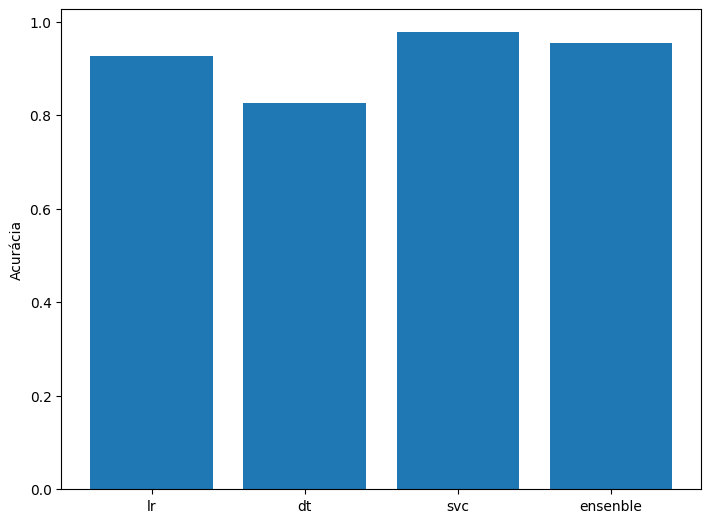

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','ensenble'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [47]:
vc = VotingClassifier(estimators=classifiers, voting='soft')
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia VC: 0.9526784605834884
[0.92708566 0.82691806 0.97773433 0.95547486 0.95267846]


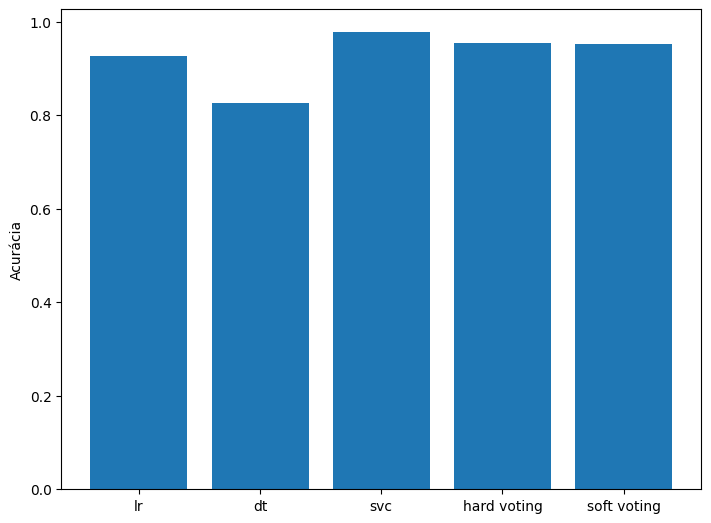

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','hard voting','soft voting'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [49]:
weights = [0.75, 0.5, 1.5]

vc = VotingClassifier(estimators=classifiers, weights=weights, voting='soft')
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia VC: 0.9610459342023587
[0.92708566 0.82691806 0.97773433 0.95547486 0.95267846 0.96104593]


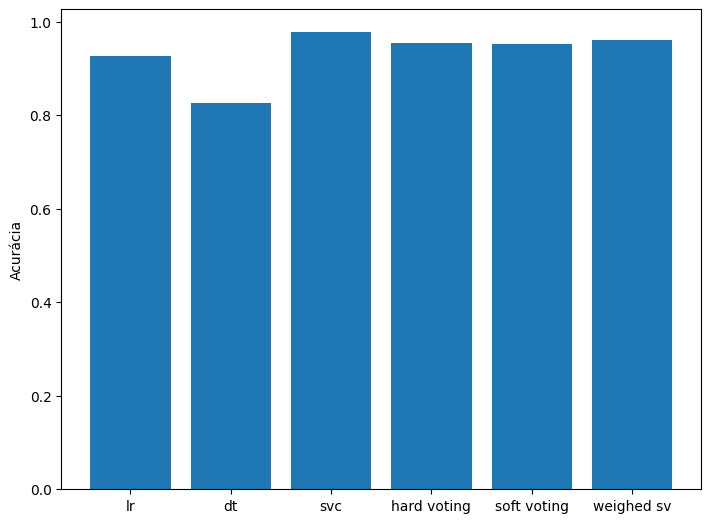

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','hard voting','soft voting', 'weighed sv'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [51]:
cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()


0.9454624456859093

In [52]:
### XGBOOSTING

In [53]:
### CATBOOSTING

### Usando Ensemble para Regressões

In [54]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)


In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -0.000 (0.000)
R2: 1.000


In [56]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -30.508 (2.892)
R2: 0.899


In [57]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -20.128 (2.020)
R2: 0.954


In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2:  %.3f (%.3f)' % (mean(n_r2), std(n_r2)))

MAE: -18.124 (1.907)
R2:  0.963 (0.009)


In [59]:

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -11.858 (1.123)
R2: 0.985


In [60]:
from lightgbm import LGBMRegressor #!pip install lightgbm

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -12.739 (1.408)
R2: 0.979


In [61]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -12.723 (1.540)
R2: 0.979


In [62]:
from xgboost import XGBRegressor #!pip install xgboost
from sklearn.model_selection import RepeatedKFold

model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -15.268 (1.446)
R2: 0.972


In [63]:
from catboost import CatBoostRegressor #!pip install catboost

model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -9.701 (1.234)
R2: 0.988
